In [ ]:
!pip install pmdarima

In [ ]:
%load_ext rpy2.ipython

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm

In [ ]:
sns.set_theme(style="darkgrid")

In [ ]:
gdp = pd.read_excel('/content/RealGDP.xlsx', index_col='date')

In [ ]:
gdp.head()

,gdp
date,
2004-04-01,11733600
2004-07-01,11859400
2004-10-01,13303400
2005-01-01,13824500
2005-04-01,12815900


In [ ]:
gdp = gdp/1000000

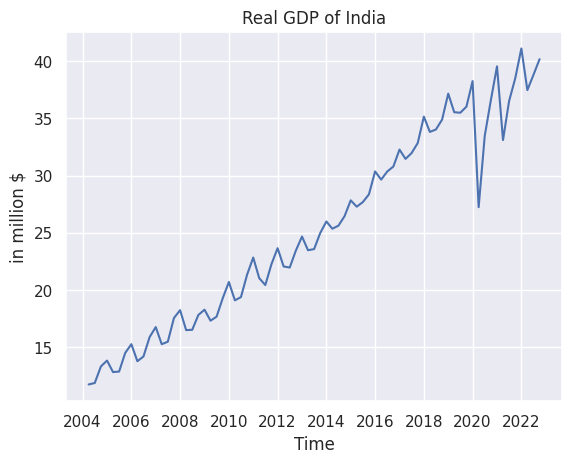

In [ ]:
sns.lineplot(gdp, legend=False)
plt.xlabel('Time')
plt.ylabel('in million $')
plt.title('Real GDP of India')
plt.show();

CoVID struck India in early 2020, which can be seen in data as 2020-Q2 (2020-04-01) GDP suffered a lot. This is a intervention in the series.

We know the series is stationary, we can also prove it using adf test

In [ ]:
pre_gdp = gdp[:'2020-01-01']

In [ ]:
dftest = adfuller(pre_gdp.gdp, autolag='AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  0.8320564331057378
2. P-Value :  0.9921363872455462
3. Num Of Lags :  4
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 59
5. Critical Values :
	 1% :  -3.5463945337644063
	 5% :  -2.911939409384601
	 10% :  -2.5936515282964665


p-value > 0.05. Hence, the series is non-stationary.

For stationary process we can do first difference-

$$ \nabla Y_t = Y_t - Y_{t-1} $$
where Y is GDP

In [ ]:
stationary_series = pre_gdp.gdp.diff(periods = 1).iloc[1:]

In [ ]:
dftest = adfuller(stationary_series, autolag='BIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -2.7331288258328437
2. P-Value :  0.06847887326201997
3. Num Of Lags :  3
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 59
5. Critical Values :
	 1% :  -3.5463945337644063
	 5% :  -2.911939409384601
	 10% :  -2.5936515282964665


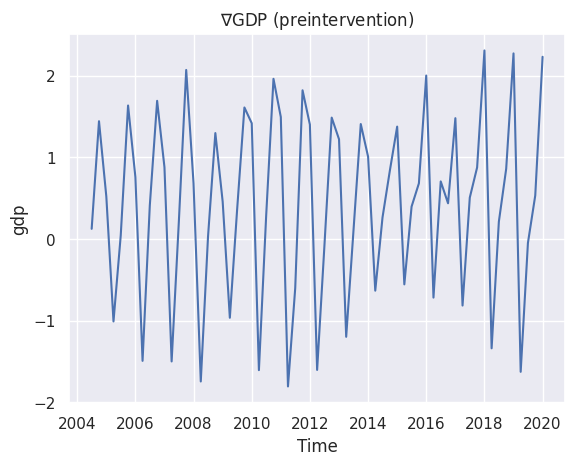

In [ ]:
sns.lineplot(stationary_series)
plt.xlabel('Time')
plt.title('$\u2207$GDP (preintervention)')
plt.show();

**Now, ACF and PACF of stationary series**

<Figure size 1000x200 with 0 Axes>

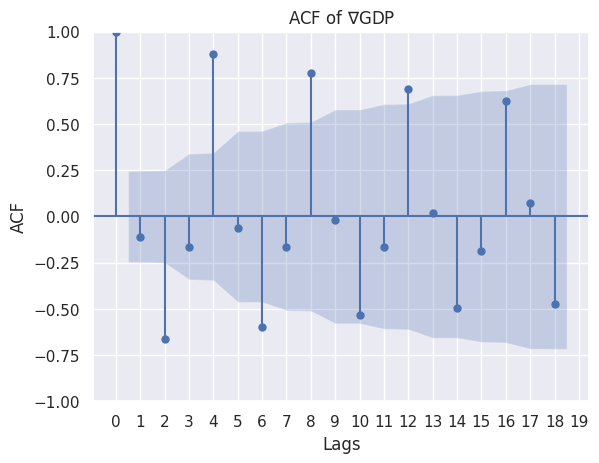

In [ ]:
plt.figure(figsize=(10, 2))
plot_acf(stationary_series);
plt.title('ACF of $\u2207$GDP')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.xticks(np.arange(0, 20, 1))
plt.show();

<Figure size 1000x200 with 0 Axes>

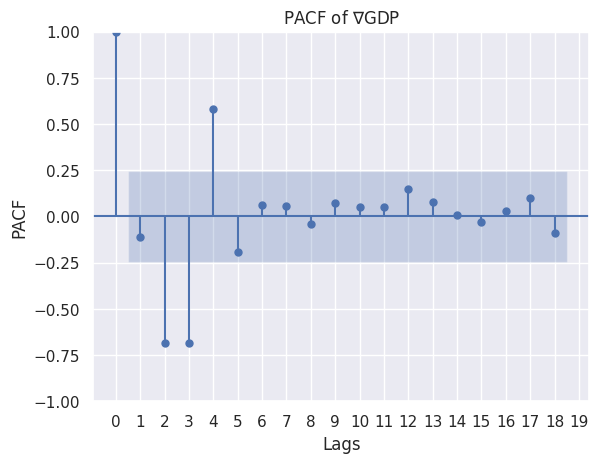

In [ ]:
plt.figure(figsize=(10, 2))
plot_pacf(stationary_series, method='ywm');
plt.title('PACF of $\u2207$GDP')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.xticks(np.arange(0, 20, 1))
plt.show();

There is seasonality, so we will

$$\nabla_4 \nabla Y_t = \nabla Y_t - \nabla Y_{t-4}$$
$$\hspace{1mm} \implies Y_t - Y_{t-1} - Y_{t-4} + Y_{t-5}$$

In [ ]:
new_series = gdp.gdp.diff(periods = 1).diff(periods = 4).iloc[5:]

ACF and PACF after removing stationarity and seasonality from series

<Figure size 1000x200 with 0 Axes>

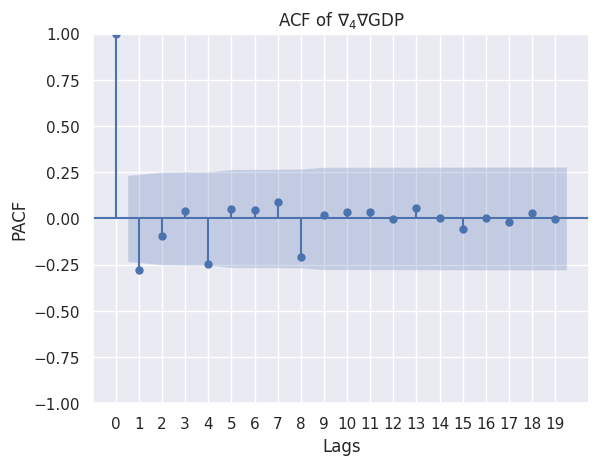

In [ ]:
plt.figure(figsize=(10, 2))
plot_acf(new_series);
plt.title('ACF of $\u2207_4 \u2207$GDP')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.xticks(np.arange(0, 20, 1))
plt.show();

<Figure size 1000x200 with 0 Axes>

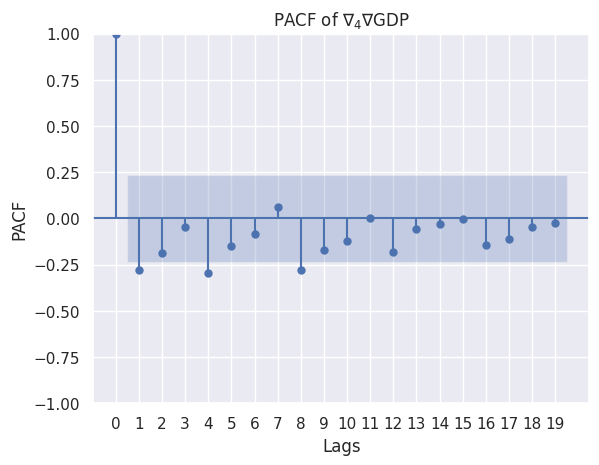

In [ ]:
plt.figure(figsize=(10, 2))
plot_pacf(new_series, method='ywm');
plt.title('PACF of $\u2207_4 \u2207$GDP')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.xticks(np.arange(0, 20, 1))
plt.show();

In [ ]:
model = pm.auto_arima(pre_gdp, seasonal=True, m=4, trace=True);
print("Selected ARIMA Order:", model.order)
print("Selected Seasonal Order:", model.seasonal_order)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[4]             : AIC=59.433, Time=0.71 sec
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=55.347, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=57.963, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=57.463, Time=0.11 sec
 ARIMA(0,1,0)(1,1,0)[4]             : AIC=55.965, Time=0.06 sec
 ARIMA(0,1,0)(0,1,1)[4]             : AIC=55.481, Time=0.06 sec
 ARIMA(0,1,0)(1,1,1)[4]             : AIC=56.240, Time=0.12 sec
 ARIMA(1,1,0)(0,1,0)[4]             : AIC=57.347, Time=0.06 sec
 ARIMA(0,1,1)(0,1,0)[4]             : AIC=57.347, Time=0.05 sec
 ARIMA(1,1,1)(0,1,0)[4]             : AIC=58.001, Time=0.16 sec
 ARIMA(0,1,0)(0,1,0)[4] intercept   : AIC=57.347, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,1,0)[4]          
Total fit time: 1.527 seconds
Selected ARIMA Order: (0, 1, 0)
Selected Seasonal Order: (0, 1, 0, 4)


**We know based on preintervention data $ARIMA(0,1,0)(0,1,0)_4$ is the model**

In [ ]:
predicted_values, confidence_intervals = model.predict(n_periods=11, return_conf_int=True)
forecast_index = pd.date_range(start='2020-01-01', periods=len(predicted_values), freq='Q')

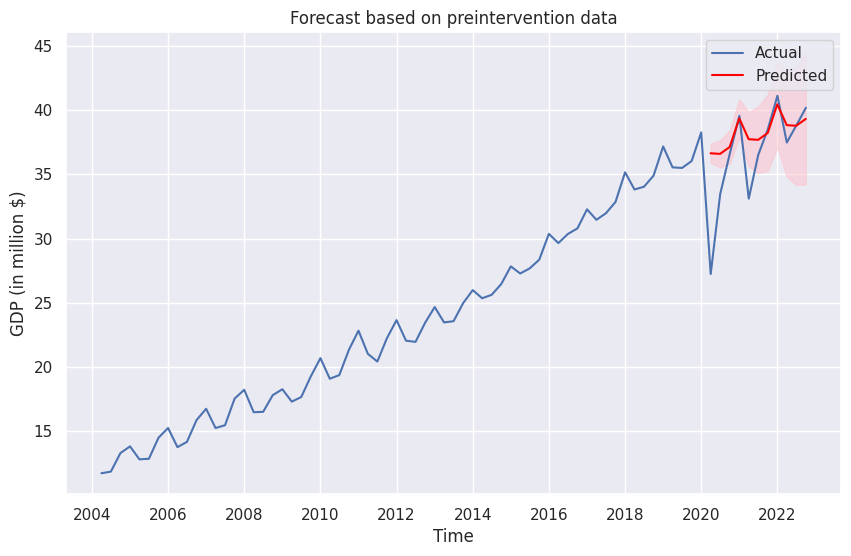

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(gdp, label='Actual')
plt.plot(forecast_index, predicted_values, label='Predicted', color='red')
plt.fill_between(forecast_index, confidence_intervals[:, 0], confidence_intervals[:, 1], color='pink', alpha=0.5)
plt.legend()
plt.xlabel('Time')
plt.ylabel('GDP (in million $)')
plt.title('Forecast based on preintervention data')
plt.show()

**Forecating and Finding best model**

In [ ]:
y = list(gdp.gdp)

Model 1- Without any intervention

In [ ]:
# Define the ARIMA model with seasonality (0, 1, 0)(0, 1, 0)[4]
order = (0, 1, 0)
seasonal_order = (0, 1, 0, 4)

model1 = SARIMAX(y, order=order, seasonal_order=seasonal_order)
results1 = model1.fit()

# Print the model summary
print(results1.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                   75
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 4)   Log Likelihood                -133.618
Date:                           Tue, 18 Jul 2023   AIC                            269.236
Time:                                   05:35:08   BIC                            271.484
Sample:                                        0   HQIC                           270.129
                                            - 75                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         2.6638      0.146     18.293      0.000       2.378       2.949
Ljung-Box (L1) (Q):                   5.66 

In [ ]:
n_forecast = 8
forecast = results1.get_forecast(steps=n_forecast)

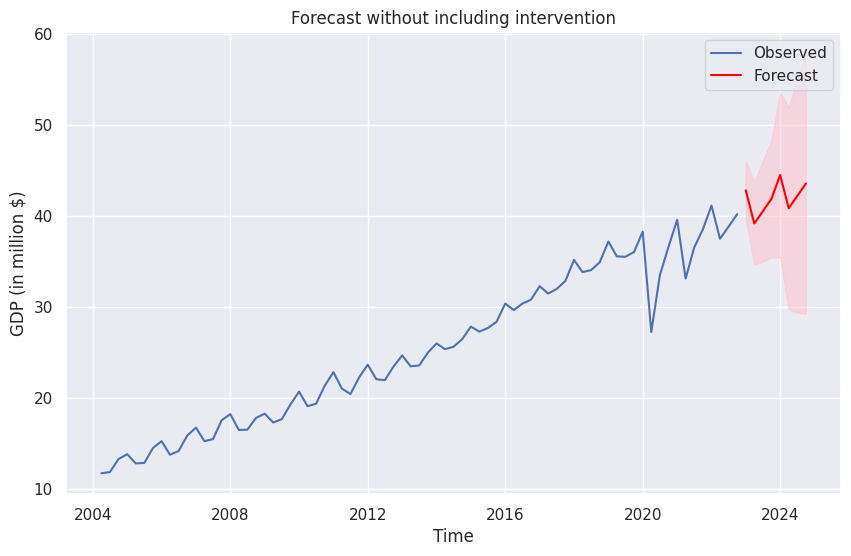

In [ ]:
# Extract the forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int(alpha=0.05)

last_date = gdp.index[-1]
forecast_dates = pd.date_range(start=last_date, periods=n_forecast, freq='Q')

# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(gdp.index, y, label='Observed')
plt.plot(forecast_dates, forecast_values, label='Forecast', color='red')

# Plot the confidence intervals
plt.fill_between(forecast_dates, confidence_intervals[:, 0], confidence_intervals[:, 1], color='pink', alpha=0.5)

plt.title('Forecast without including intervention')
plt.xlabel('Time')
plt.ylabel('GDP (in million $)')
plt.legend()
plt.show()


In [ ]:
forecast_values

array([42.8017, 39.1572, 40.488 , 41.8639, 44.4798, 40.8353, 42.1661,
       43.542 ])

Model 2- With innovative outlier at 65, 66 and 69

In [ ]:
# Create an exogenous variable for the innovative outliers
outlier_data = np.zeros(len(y))
outlier_indices = [64, 65, 68]
outlier_data[outlier_indices] = 1

# Create a DataFrame with the exogenous variable
exog_data = pd.DataFrame({'Outliers': outlier_data})

# Create and fit the ARIMA model with the seasonal order and exogenous variable
model2 = SARIMAX(y, order=order, seasonal_order=seasonal_order, exog=exog_data)
results2 = model2.fit()

# Print the model summary
print(results2.summary())


                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                   75
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 4)   Log Likelihood                -125.511
Date:                           Tue, 18 Jul 2023   AIC                            255.021
Time:                                   05:35:09   BIC                            259.518
Sample:                                        0   HQIC                           256.807
                                            - 75                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Outliers      -2.5349      0.249    -10.188      0.000      -3.023      -2.047
sigma2         2.1131      0.135     15.644

In [ ]:
n_forecast = 8
forecast = results2.get_forecast(steps=n_forecast, exog=exog_data[-8:])

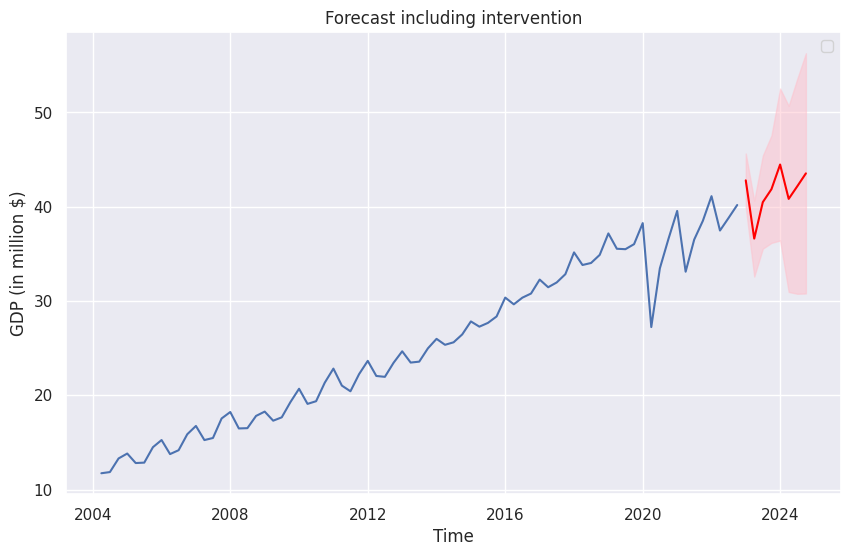

In [ ]:
# Extract the forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

last_date = gdp.index[-1]
forecast_dates = pd.date_range(start=last_date, periods=n_forecast, freq='Q')

# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(gdp.index, y, label='Observed')
plt.plot(forecast_dates, forecast_values, label='Forecast', color='red')

# Plot the confidence intervals
plt.fill_between(forecast_dates, confidence_intervals['lower y'], confidence_intervals['upper y'], color='pink', alpha=0.5)

plt.title('Forecast including intervention')
plt.xlabel('Time')
plt.ylabel('GDP (in million $)')
plt.legend('')
plt.show()


In [ ]:
forecast_values

75    42.801700
76    36.622265
77    40.488000
78    41.863900
79    44.479800
80    40.835300
81    42.166100
82    43.542000
Name: predicted_mean, dtype: float64

Now the model is-
$$\nabla_4 \nabla Y_t = \epsilon_t$$
$$\hspace{1mm} \implies Y_t = Y_{t-1} + Y_{t-4} - Y_{t-5} + \epsilon_t$$